In [1]:
import matplotlib
%matplotlib inline
import netCDF4
import cartopy

import numpy
from matplotlib import pyplot

In [2]:
config = 'WW3_AT_metop_2019_6b_sat1_rot60'
data = netCDF4.Dataset('/mnt/data_m/skim_at_output/{}/{}_c01_p800.nc'.format(config, config))
#data = netCDF4.Dataset('/tmp/key/data/skim_at_output/WW3_AT_metop_2018_8a_c01_p299.nc')
#data = netCDF4.Dataset('/mnt/data/project/skim/skim_output/natl60/WW3_23Wtest_8b60az_c01_p011.nc')
lon = numpy.mod(data['lon'][:] +180, 360) -180
lat = data['lat'][:]
lon_nadir = numpy.mod(data['lon_nadir'][:] +180, 360) -180
lat_nadir = data['lat_nadir'][:]
#var1 = data['ucur'][:]
#var2 = data['vcur'][:]
#var = numpy.sqrt(var1**2 + var2**2)
var = data['yaw'][:]
var1 = data['yaw_aocs'][:]
var2 = data['yaw_ted'][:]
#x_ac = data['x_ac'][:]
#x_al = data['x_al'][:]
modelbox = (numpy.min(lon), numpy.max(lon), numpy.min(lat), numpy.max(lat))
print(data.variables.keys())
data.close()

odict_keys(['time', 'time_nadir', 'lon', 'lon_nadir', 'lat', 'lat_nadir', 'ssh_obs_nadir', 'ur_true', 'instr_nadir', 'instr', 'radial_angle', 'vwnd', 'uwb', 'ssh_true_nadir', 'uwb_noerr', 'vindice_nadir', 'vindice', 'ur_obs', 'sigma0', 'mssxy', 'mssc', 'mssu', 'ur_uss', 'ucur', 'vcur', 'uuss', 'vuss', 'ice', 'mssd', 'mssx', 'mssy', 'ssh', 'hs', 'uwnd', 'rain', 'yaw', 'yaw_aocs', 'yaw_ted', 'uwb_corr'])


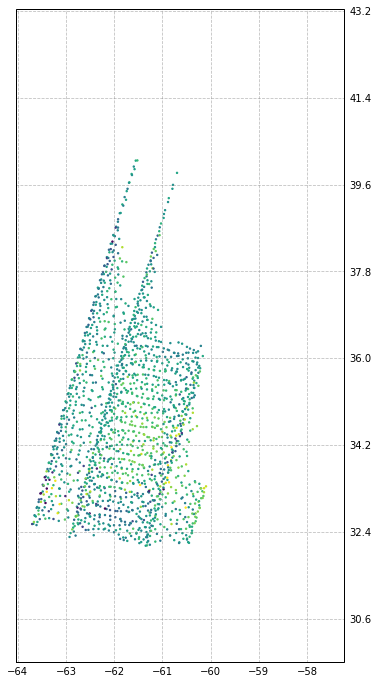

In [65]:
projection = cartopy.crs.PlateCarree()
transform = cartopy.crs.PlateCarree()
#modelbox = [-70, -50, 30, 40]
modelbox = [numpy.min(lon), numpy.max(lon), numpy.min(lat), numpy.max(lat)]
fig = pyplot.figure(figsize=(12,12))
ax = pyplot.axes(projection=projection)
if modelbox is not None:
    ax.set_extent([modelbox[0], modelbox[1],  modelbox[2], modelbox[3]],
                     crs=transform)
    norder = 6
else:
    ax.set_global()
    norder = 1
    #ax.add_feature(cartopy.feature.OCEAN, zorder=norder)
ax.add_feature(cartopy.feature.LAND, zorder=norder, edgecolor='black')
gl = ax.gridlines(crs=transform, draw_labels=True, color='gray',
                   linestyle='--', alpha=0.5)
gl.xlabels_top = False
gl.ylabels_left = False
listcolor = ['c', 'y', 'b', 'g', 'k', 'r', 'c', 'y']
#listcolor = ['c', 'y', 'b', 'r', 'c', 'y']

for i in range(numpy.shape(lon)[1]):
    pyplot.scatter(lon[:, i], lat[:, i], 2, c=var[:, i]) #var[:, i], vmin=-0.15, vmax=0.15) #, vmin=-150, vmax=150, cmap='jet')
#pyplot.colorbar()
pyplot.savefig('{}_beams.png'.format(config))